<a href="https://colab.research.google.com/github/olhacherenkova/Python-projects/blob/main/Sales_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Ma/Module_Task

products = pd.read_csv("products.csv")
products.head()


Mounted at /content/drive
/content/drive/MyDrive/Ma/Module_Task


,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [2]:
events = pd.read_csv("events.csv")
events.head()


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [3]:
countries = pd.read_csv("countries.csv")
countries.head()


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


Таблиця events.csv складається з таких колонок:
1. Order ID - номер замовлення
2. Order Date - дата замовлення
3. Ship Date - дата відправки
4. Order Priority - пріорітет замовлення
5. Country Code - код країни
6. Product ID - код продукту
7. Sales Channel	 - канал продажу
8. Units Sold	- кількість проданих одиниць
9. Unit Price	- ціна одиниці
10. Unit Cost - вартість одиниці

Таблиця products.csv складається з таких колонок:
1. id	 - id продукту
2. item_type - тип продукту

Таблиця countries.csv складається з таких колонок:
1. name - назва країни
2. alpha-2	 - код країни з 2 літер
3. alpha-3	 - код країни з 3 літер
4. region	- регіон, до якого належить країна
5. sub-region - суб-регіон, до якого належить країна

Ключові поля, що поєднують таблиці:


*   events.csv поєднується з products.csv за полями - Product ID  та id відповідно;
*   events.csv поєднується з countries.csv  за полями - Country Code  та alpha-3 відповідно.





In [4]:
events.info()
print(events.isna().sum() / events.shape[0] * 100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [5]:
countries.info()
print(countries.isna().sum() / countries.shape[0] * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


Таблиця events містить пропущені значення у стовпці Country Code, що становить 6% від усіх значень- можна ці дані видалити, їх вплив на середні показники не значний. Також є відсутні значення в стовпці Units Sold - їх доля не велика - тому ці рядки можна видалити.
В таблиці products відсутні пропущені значення.
В таблиці countries є відсутні значення, їх доля не значна - тому їх можна видалити.


In [7]:
# Видалення відсутній значень
events = events.dropna(subset=["Units Sold","Country Code"])
countries = countries.dropna()


In [8]:
# Перетворення типів даних, а саме стовпців з датами
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1246 non-null   int64         
 1   Order Date      1246 non-null   datetime64[ns]
 2   Ship Date       1246 non-null   datetime64[ns]
 3   Order Priority  1246 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1246 non-null   int64         
 6   Sales Channel   1246 non-null   object        
 7   Units Sold      1246 non-null   float64       
 8   Unit Price      1246 non-null   float64       
 9   Unit Cost       1246 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 107.1+ KB


In [9]:
# Дослідження даних на наявність дублікатів
duplicate_rows = events.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())


0       False
1       False
3       False
4       False
5       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1246, dtype: bool
0


In [10]:
# Дослідження на аномалії
events.describe()


,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.246000e+03,1246,1246,1246.000000,1246.000000,1246.000000,1246.000000
mean,5.432231e+08,2013-10-11 14:45:15.890850816,2013-11-05 11:46:07.897271296,5756.146067,4953.186998,264.203387,186.310088
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.237987e+08,2011-12-09 18:00:00,2011-12-31 12:00:00,2455.000000,2349.250000,81.730000,35.840000
50%,5.438407e+08,2013-10-14 00:00:00,2013-11-03 00:00:00,5988.000000,4980.000000,154.060000,97.440000
75%,7.539619e+08,2015-09-01 12:00:00,2015-10-07 18:00:00,8293.000000,7477.000000,433.372500,263.330000
max,9.998797e+08,2017-07-22 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573524e+08,NaN,NaN,2827.558739,2915.825155,216.592937,175.503652


In [11]:
# З’єднання трьох таблиць в один датафрейм
data = pd.merge(events,countries, left_on = "Country Code", right_on="alpha-3", how = "left")
data = pd.merge(data, products, left_on = "Product ID", right_on="id", how = "left")
data = data.drop(["Country Code", "alpha-2","alpha-3","id"],axis= "columns")
data.columns = ["order_id", "order_date", "ship_date","order_priority","product_id","sales_channel", "units_sold", "unit_price","unit_cost", "country_name", "region", "sub-region", "item_type"]
data["sales_channel"] = data["sales_channel"].str.lower()
data.head()

,order_id,order_date,ship_date,order_priority,product_id,sales_channel,units_sold,unit_price,unit_cost,country_name,region,sub-region,item_type
0,100640618,2014-10-08,2014-10-18,M,2103,online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,2103,offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,102230632,2017-05-13,2017-06-13,L,2455,online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
3,103435266,2012-08-11,2012-09-18,H,1270,offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages
4,103450715,2015-03-15,2015-04-18,H,8681,online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies


In [12]:
print("Ключові метрики діяльності компанії")
print("-----------------------------------------------")
print(f"Загальна кількість замовлень - {data.shape[0]}")
data["sales"] = data["units_sold"] * data["unit_price"]
data["cost"] = data["units_sold"] * data["unit_cost"]
data["profit"] = data["sales"] - data["cost"]
print(f"Загальна сума продажів - {data["sales"].sum()}")
print(f"Загальна собіварітість  - {data["cost"].sum():.2f}")
print(f"Загальний прибуток  - {data["profit"].sum()}")
print(f"Закальна кількість охоплених країн  - {data["country_name"].nunique()}")
print(f"Закальна кількість охоплених регіонів  - {data["region"].nunique()}")
print("-----------------------------------------------")
data.head()

Ключові метрики діяльності компанії
-----------------------------------------------
Загальна кількість замовлень - 1246
Загальна сума продажів - 1598983761.26
Загальна собіварітість  - 1125274726.20
Загальний прибуток  - 473709035.06
Закальна кількість охоплених країн  - 45
Закальна кількість охоплених регіонів  - 2
-----------------------------------------------


,order_id,order_date,ship_date,order_priority,product_id,sales_channel,units_sold,unit_price,unit_cost,country_name,region,sub-region,item_type,sales,cost,profit
0,100640618,2014-10-08,2014-10-18,M,2103,online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,2103,offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87
2,102230632,2017-05-13,2017-06-13,L,2455,online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24
3,103435266,2012-08-11,2012-09-18,H,1270,offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68
4,103450715,2015-03-15,2015-04-18,H,8681,online,2220.0,651.21,524.96,Slovakia,Europe,Eastern Europe,Office Supplies,1445686.20,1165411.20,280275.00


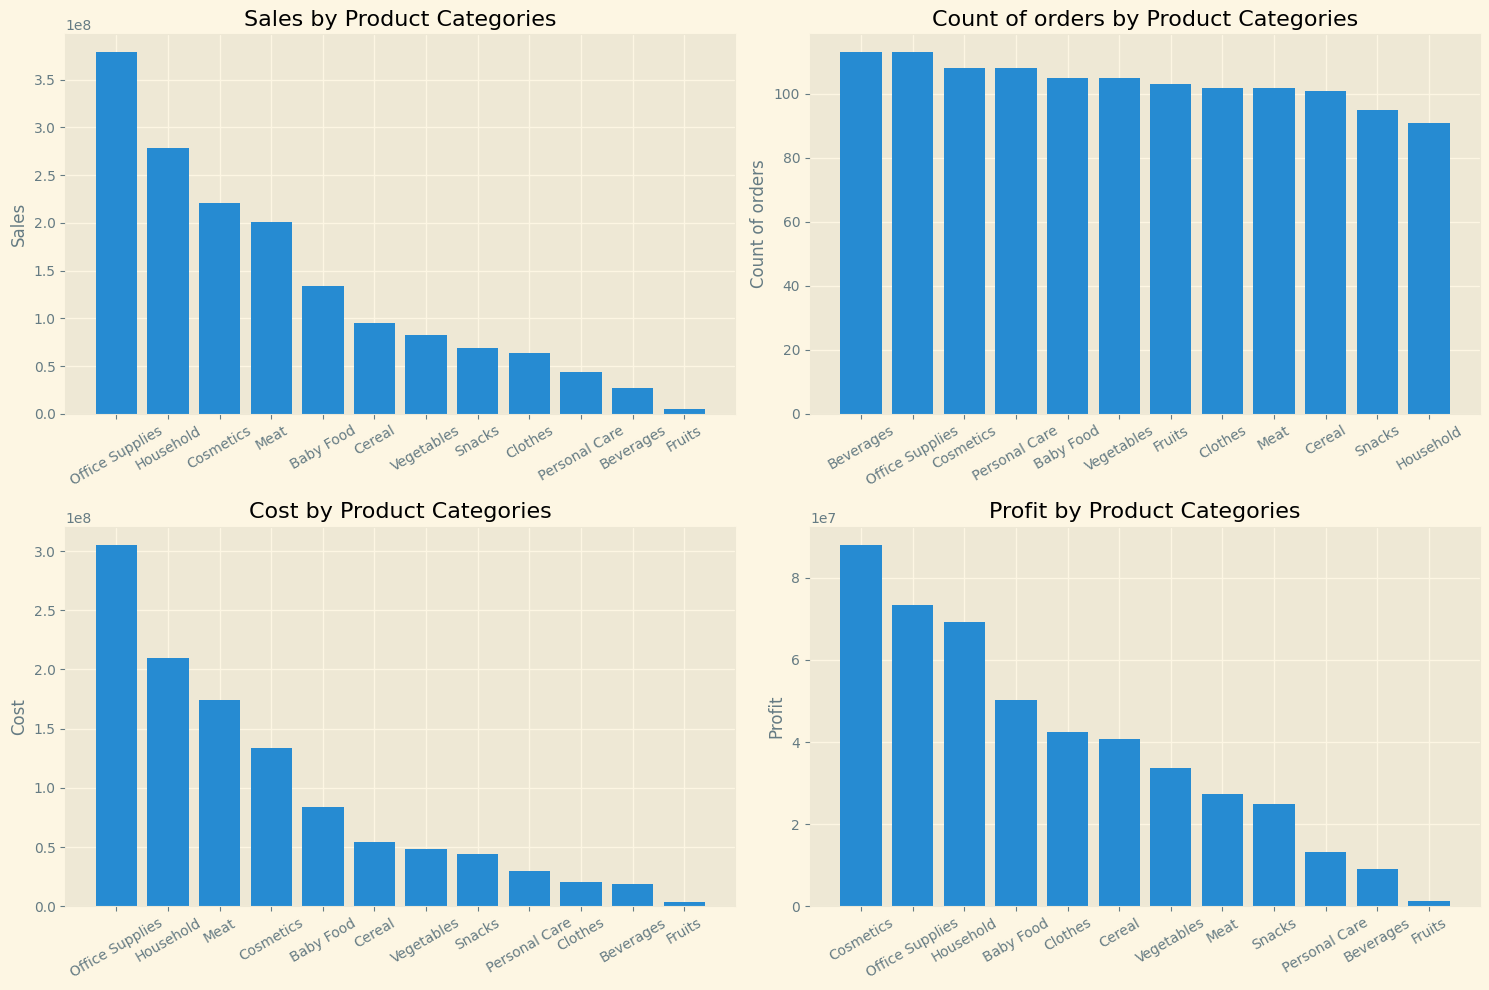

In [23]:
plt.style.use("Solarize_Light2")
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

grouped_by_product_item = data.groupby("item_type")["sales"].sum().reset_index().sort_values("sales", ascending=False)
ax[0, 0].bar(grouped_by_product_item["item_type"],grouped_by_product_item["sales"])
ax[0, 0].set_title("Sales by Product Categories")
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("Sales")
ax[0, 0].tick_params(axis='x', labelrotation=30)

grouped_by_product_item_and_orders = data.groupby("item_type")["order_id"].count().reset_index().sort_values("order_id", ascending=False)
ax[0, 1].bar(grouped_by_product_item_and_orders["item_type"], grouped_by_product_item_and_orders["order_id"])
ax[0, 1].set_title("Count of orders by Product Categories")
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("Count of orders")
ax[0, 1].tick_params(axis='x', labelrotation=30)

grouped_by_product_cost = data.groupby("item_type")["cost"].sum().reset_index().sort_values("cost", ascending=False)
ax[1, 0].bar(grouped_by_product_cost["item_type"],grouped_by_product_cost["cost"])
ax[1, 0].set_title("Cost by Product Categories")
ax[1, 0].set_xlabel("")
ax[1, 0].set_ylabel("Cost")
ax[1, 0].tick_params(axis='x', labelrotation=30)

grouped_by_product_revenue = data.groupby("item_type")["profit"].sum().reset_index().sort_values("profit", ascending=False)
ax[1, 1].bar(grouped_by_product_revenue["item_type"], grouped_by_product_revenue["profit"])
ax[1, 1].set_title("Profit by Product Categories")
ax[1, 1].set_xlabel("")
ax[1, 1].set_ylabel("Profit")
ax[1, 1].tick_params(axis='x', labelrotation=30)

plt.tight_layout()
plt.show()



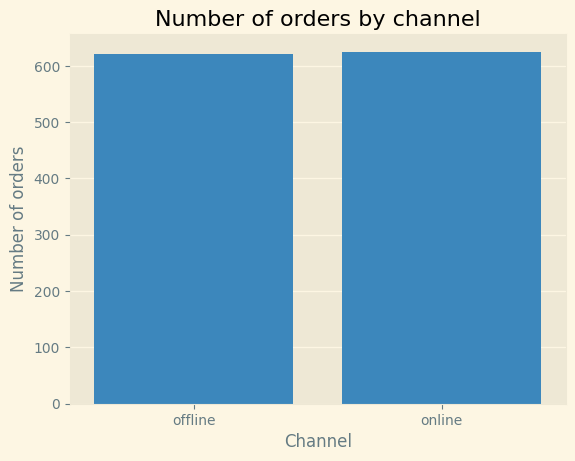

In [14]:
grouped_by_sales_channel = data.groupby("sales_channel")["order_id"].count()
sns.barplot(x=grouped_by_sales_channel.index, y=grouped_by_sales_channel.values)
plt.title("Number of orders by channel")
plt.xlabel("Channel")
plt.ylabel("Number of orders")
plt.show()


Кількість замовлень офлайн та онлайн майже однакова.

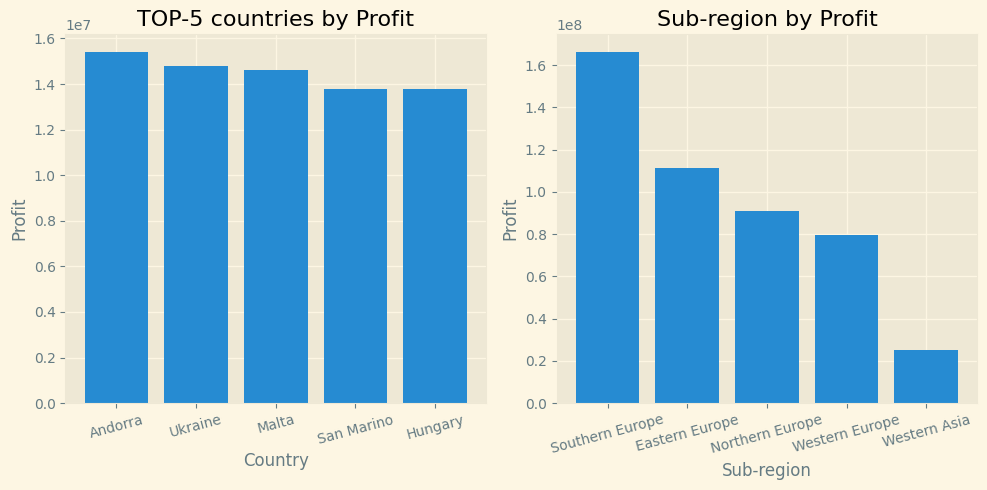

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
grouped_by_counties_and_profit = data.groupby("country_name")["profit"].sum().reset_index()
top5 = grouped_by_counties_and_profit.sort_values("profit", ascending=False).head(5)

ax[0].bar(top5["country_name"], top5["profit"])
ax[0].set_title("TOP-5 countries by Profit")
ax[0].set_xlabel("Country")
ax[0].set_ylabel("Profit")
ax[0].tick_params(axis='x', labelrotation=15)

grouped_by_region_and_profit = data.groupby("sub-region")["profit"].sum().reset_index().sort_values("profit", ascending=False)

ax[1].bar(grouped_by_region_and_profit["sub-region"], grouped_by_region_and_profit["profit"])
ax[1].set_title("Sub-region by Profit")
ax[1].set_xlabel("Sub-region")
ax[1].set_ylabel("Profit")
ax[1].tick_params(axis='x', labelrotation=15)

plt.tight_layout()
plt.show()

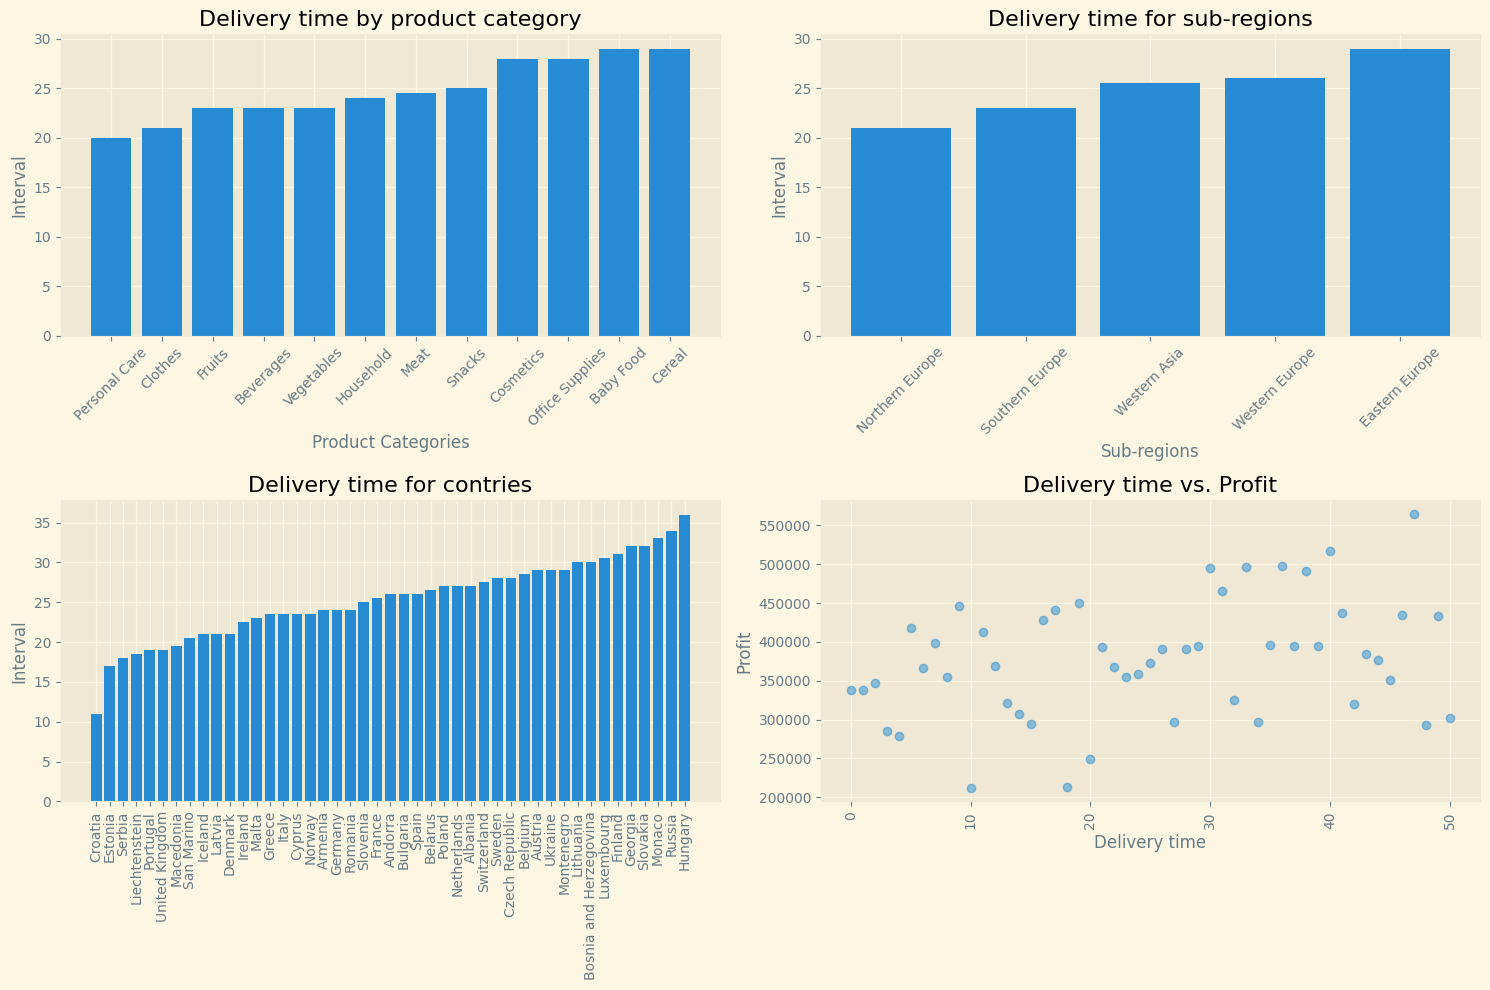

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# First subplot
data["interval"] = (data["ship_date"] - data["order_date"]).dt.days
avg_interval_by_product_category = data.groupby("item_type")["interval"].median().reset_index().sort_values("interval")
ax[0, 0].bar(avg_interval_by_product_category["item_type"], avg_interval_by_product_category["interval"])
ax[0, 0].set_title("Delivery time by product category")
ax[0, 0].set_xlabel("Product Categories")
ax[0, 0].set_ylabel("Interval")
ax[0, 0].tick_params(axis='x', labelrotation=45)

# Second subplot
avg_interval_by_regions = data.groupby("sub-region")["interval"].median().reset_index().sort_values("interval")
ax[0, 1].bar(avg_interval_by_regions["sub-region"], avg_interval_by_regions["interval"])
ax[0, 1].set_title("Delivery time for sub-regions")
ax[0, 1].set_xlabel("Sub-regions")
ax[0, 1].set_ylabel("Interval")
ax[0, 1].tick_params(axis='x', labelrotation=45)

# Third subplot
avg_interval_by_contries = data.groupby("country_name")["interval"].median().reset_index().sort_values("interval")
ax[1, 0].bar(avg_interval_by_contries["country_name"], avg_interval_by_contries["interval"])
ax[1, 0].set_title("Delivery time for contries")
ax[1, 0].set_xlabel("")
ax[1, 0].set_ylabel("Interval")
ax[1, 0].tick_params(axis='x', labelrotation=90)


# Fourth subplot
interval_profit = data.groupby("interval")["profit"].mean()
ax[1, 1].scatter(interval_profit.index, interval_profit.values, alpha=0.5)
ax[1, 1].set_title("Delivery time vs. Profit")
ax[1, 1].set_xlabel("Delivery time")
ax[1, 1].set_ylabel("Profit")
ax[1, 1].tick_params(axis='x', labelrotation=90)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

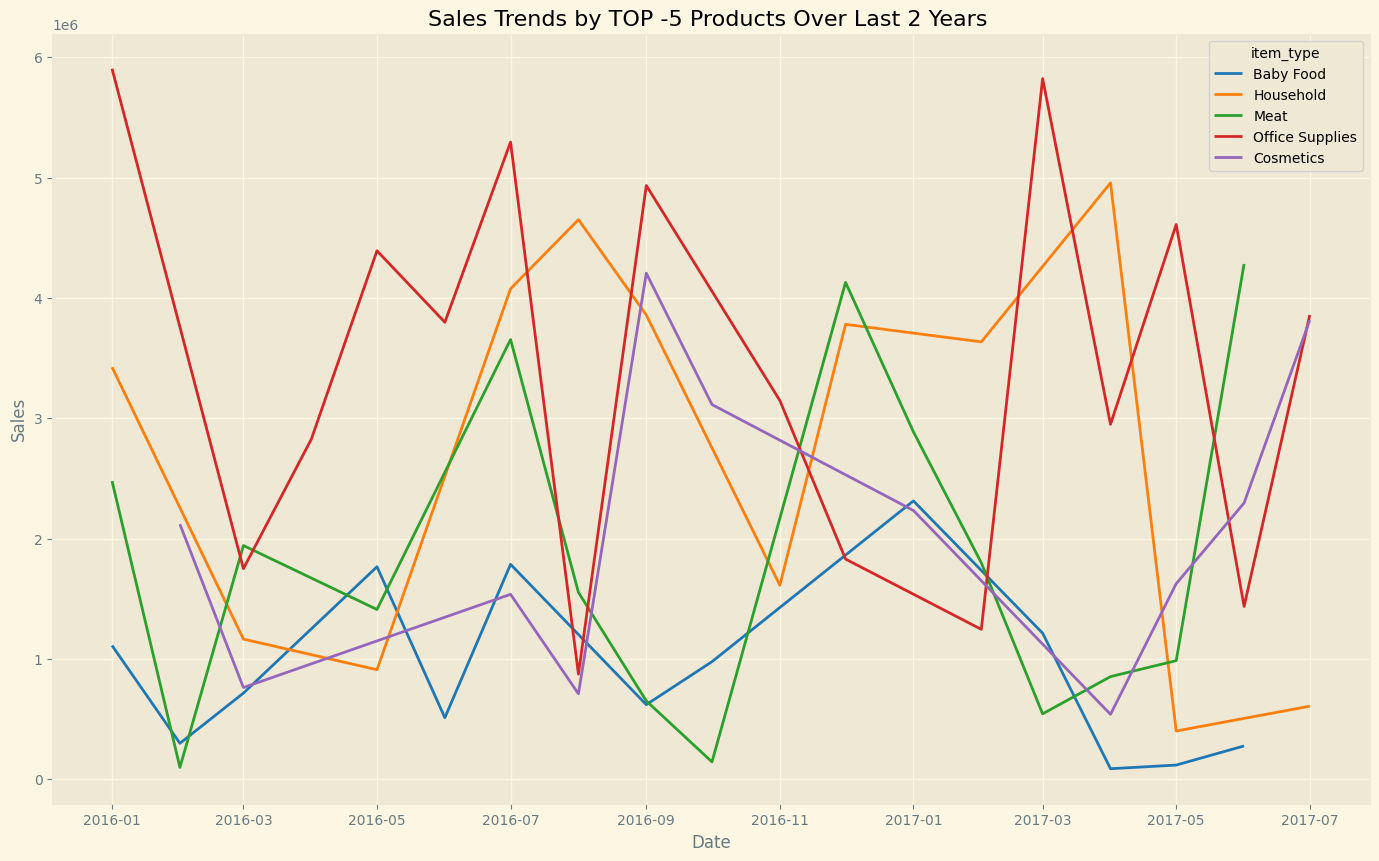

In [17]:
data["month_year"] = data['order_date'].dt.to_period("M").dt.to_timestamp()
data["year"] = data["order_date"].dt.year
last_years = sorted(data["year"].unique().tolist())[-2:]
top_5= grouped_by_product_item.head(5)['item_type'].tolist()
sales_dynamics= data.groupby(["year","month_year","item_type", "country_name","sub-region"])["sales"].sum().reset_index()
top_5_sales_dynamics = sales_dynamics[sales_dynamics["item_type"].isin(top_5)].reset_index()
top_5_sales_dynamics_last_year = top_5_sales_dynamics[top_5_sales_dynamics["year"].isin(last_years)].reset_index()
plt.figure(figsize=(17, 10))
sns.lineplot(x="month_year", y="sales", data=top_5_sales_dynamics_last_year, hue ="item_type", palette="tab10", errorbar=None)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trends by TOP -5 Products Over Last 2 Years ")
plt.show()

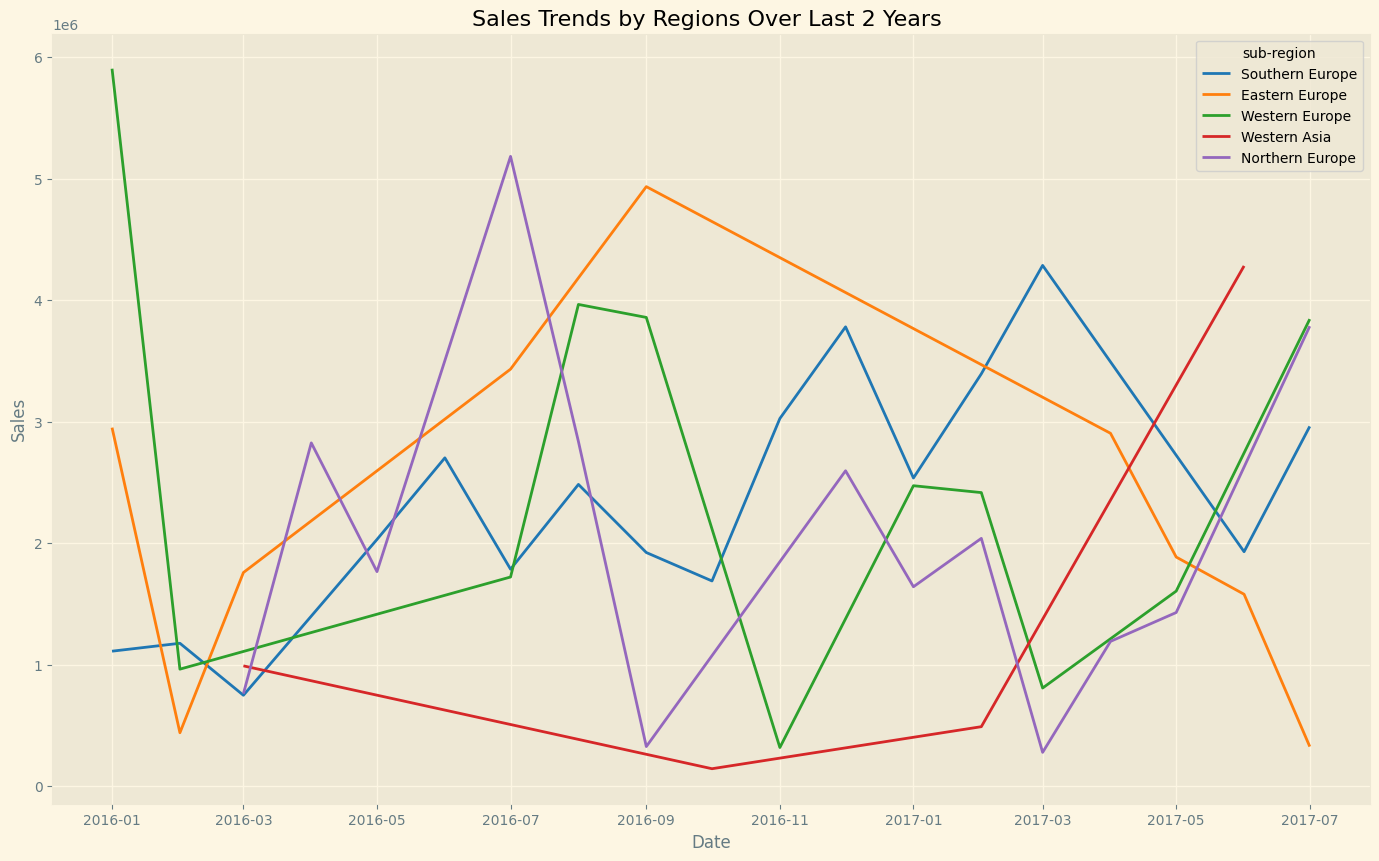

In [18]:
plt.figure(figsize=(17, 10))
sns.lineplot(x="month_year", y="sales", data=top_5_sales_dynamics_last_year, hue ="sub-region", palette="tab10", errorbar=None)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trends by Regions Over Last 2 Years ")
plt.show()

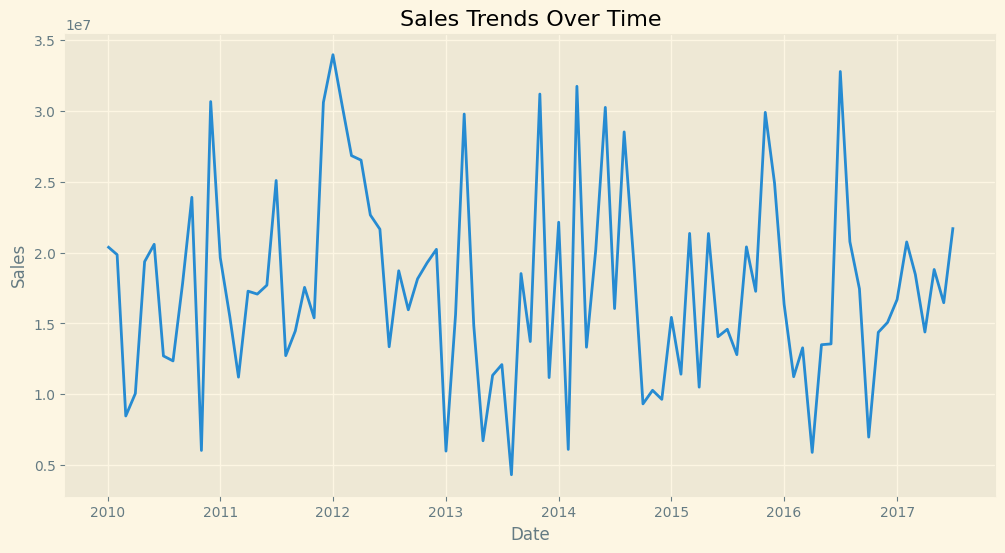

In [19]:
sales_over_time = data.groupby("month_year")["sales"].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, label="Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trends Over Time")
plt.show()

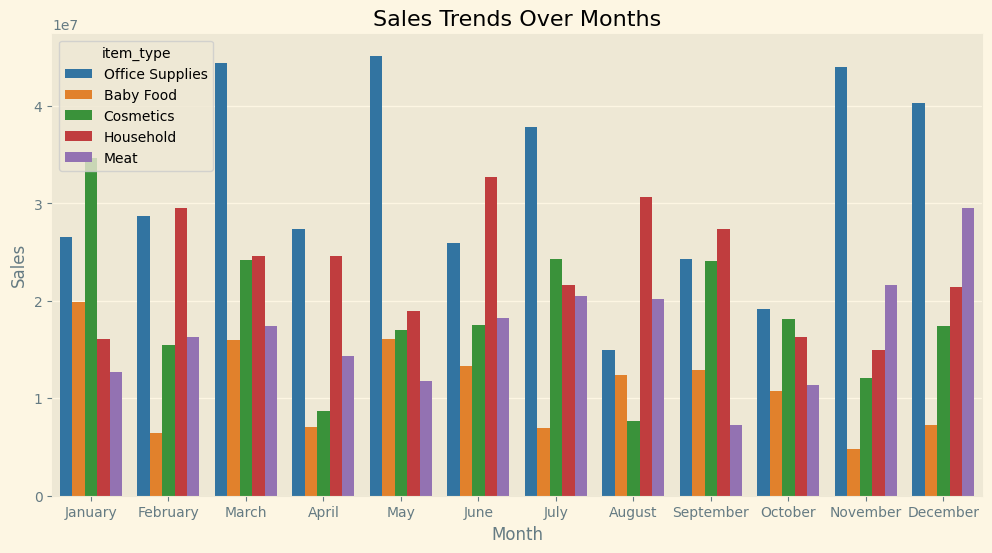

In [20]:
data["month_name"] = data["order_date"].dt.month_name()
data["month_num"] = data["order_date"].dt.month
monthly_sales = data.groupby(["month_name","month_num","item_type"])["sales"].sum().reset_index().sort_values("month_num")
top_5_items = monthly_sales[monthly_sales['item_type'].isin(top_5)].reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x= "month_name", y = "sales", data = top_5_items, hue = "item_type", palette="tab10" )
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales Trends Over Months")
plt.show()



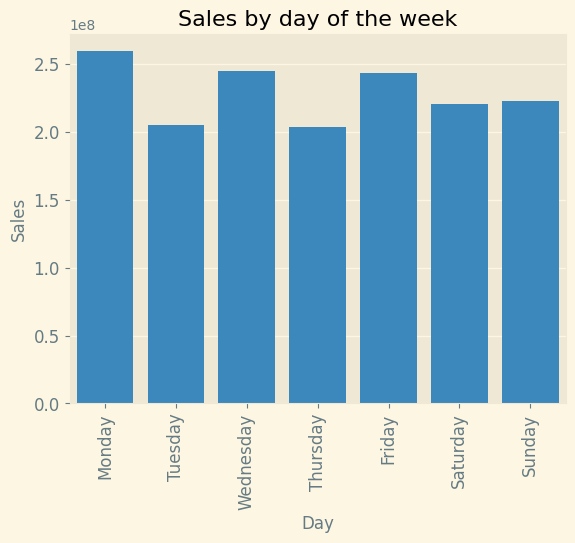

In [21]:
data["day_name"] = data["order_date"].dt.day_name()
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
group_by_day = data.groupby("day_name")["sales"].sum().reindex(days_order).reset_index()
sns.barplot(x="day_name", y ="sales", data =group_by_day)
plt.title("Sales by day of the week")
plt.xlabel("Day")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.ylabel("Sales")
plt.show()

# Висновок.
Ключові метрики діяльності компанії
 - Загальна кількість замовлень - 1246
 - Загальна сума продажів - 1598983761.26
 - Загальна собіварітість  - 1125274726.20
 - Загальний прибуток  - 473709035.06
 - Загальна кількість охоплених країн  - 45
 - Загальна кількість охоплених регіонів  - 2

Найбільше продажів і замовлень в категорії - Office Supplies. Собівартість ціє категорії теж найвища. Найьідбший прибуток приносить категорія - Cosmetics.Найменший дохід компанії приносить категорія Fruits, в цій категорії і найменше продажів.
Кількість замовлень офлайн та онлайн майже однакова.
Найбільше прибутку приносять країни східної Європи.
Топ-5 країн за прибутком від продажів  - Andorra, Ukraine, Malta, San Marino, Hungary.
Середній час доставки коливається від 10 до 28 днів. Час доставки не впливає на прибуток, також час доставки не залежить від регіону або категорії товару.
Продажі коливаються коливаються в межах від 5 млн до 35 млн. Є чіткі піки та спади. У більшості років видно повторювані піки,що свідчить про сезонність. Зазвичай продажі найбільші у березні та січні.
Деякі товари можна вважати сезонними - Cosmetics продажі найвищі у січні, Office Supplies високі продажі у місяцях 3, 5, 7, 11, 12. Для категорії Meat кількість продажів зростає у літні місяці та у грудні.
Найбільше продажів у Понеділок, Середу та П'ятницю.
